In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
761,9,170,74,31,0,44.0,0.403,43,1
443,8,108,70,0,0,30.5,0.955,33,1
242,3,139,54,0,0,25.6,0.402,22,1
639,1,100,74,12,46,19.5,0.149,28,0
632,2,111,60,0,0,26.2,0.343,23,0


In [8]:
df.isnull().sum()  #it returns the number of missing values in the dataset.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.duplicated

<bound method DataFrame.duplicated of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.6

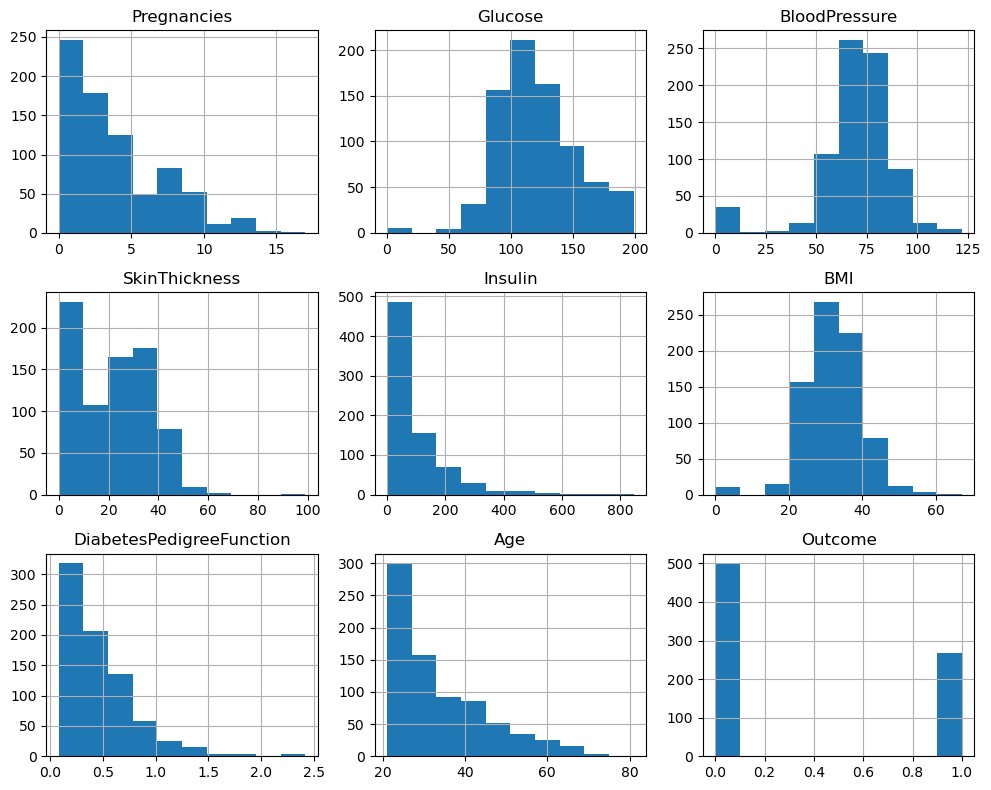

In [7]:
df.hist(figsize=(10,8))   #checking data distribution
plt.tight_layout()
plt.show()

Extract data from the outcome column as a variable named Y: Extract the values
from the ‘outcome’ column and assign them to a variable called Y.

In [8]:
X=df.iloc[:,:-1]
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
Y=df.iloc[:,-1]
Y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=51)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


# Train the model

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluate the model

In [14]:
Y_predict = logistic.predict(X_test)
print("Y_predict:\n",Y_predict)

Y_predict:
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0]


In [15]:
print("Y_test:\n",Y_test)


Y_test:
 737    0
505    0
296    1
711    0
329    0
      ..
405    0
315    0
131    1
364    0
322    1
Name: Outcome, Length: 231, dtype: int64


In [18]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,Y_predict)
print("Accuracy Score: ",score*100)

Accuracy Score:  79.65367965367966


In [19]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(Y_test,Y_predict)

array([[132,  10],
       [ 37,  52]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       142
           1       0.84      0.58      0.69        89

    accuracy                           0.80       231
   macro avg       0.81      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231



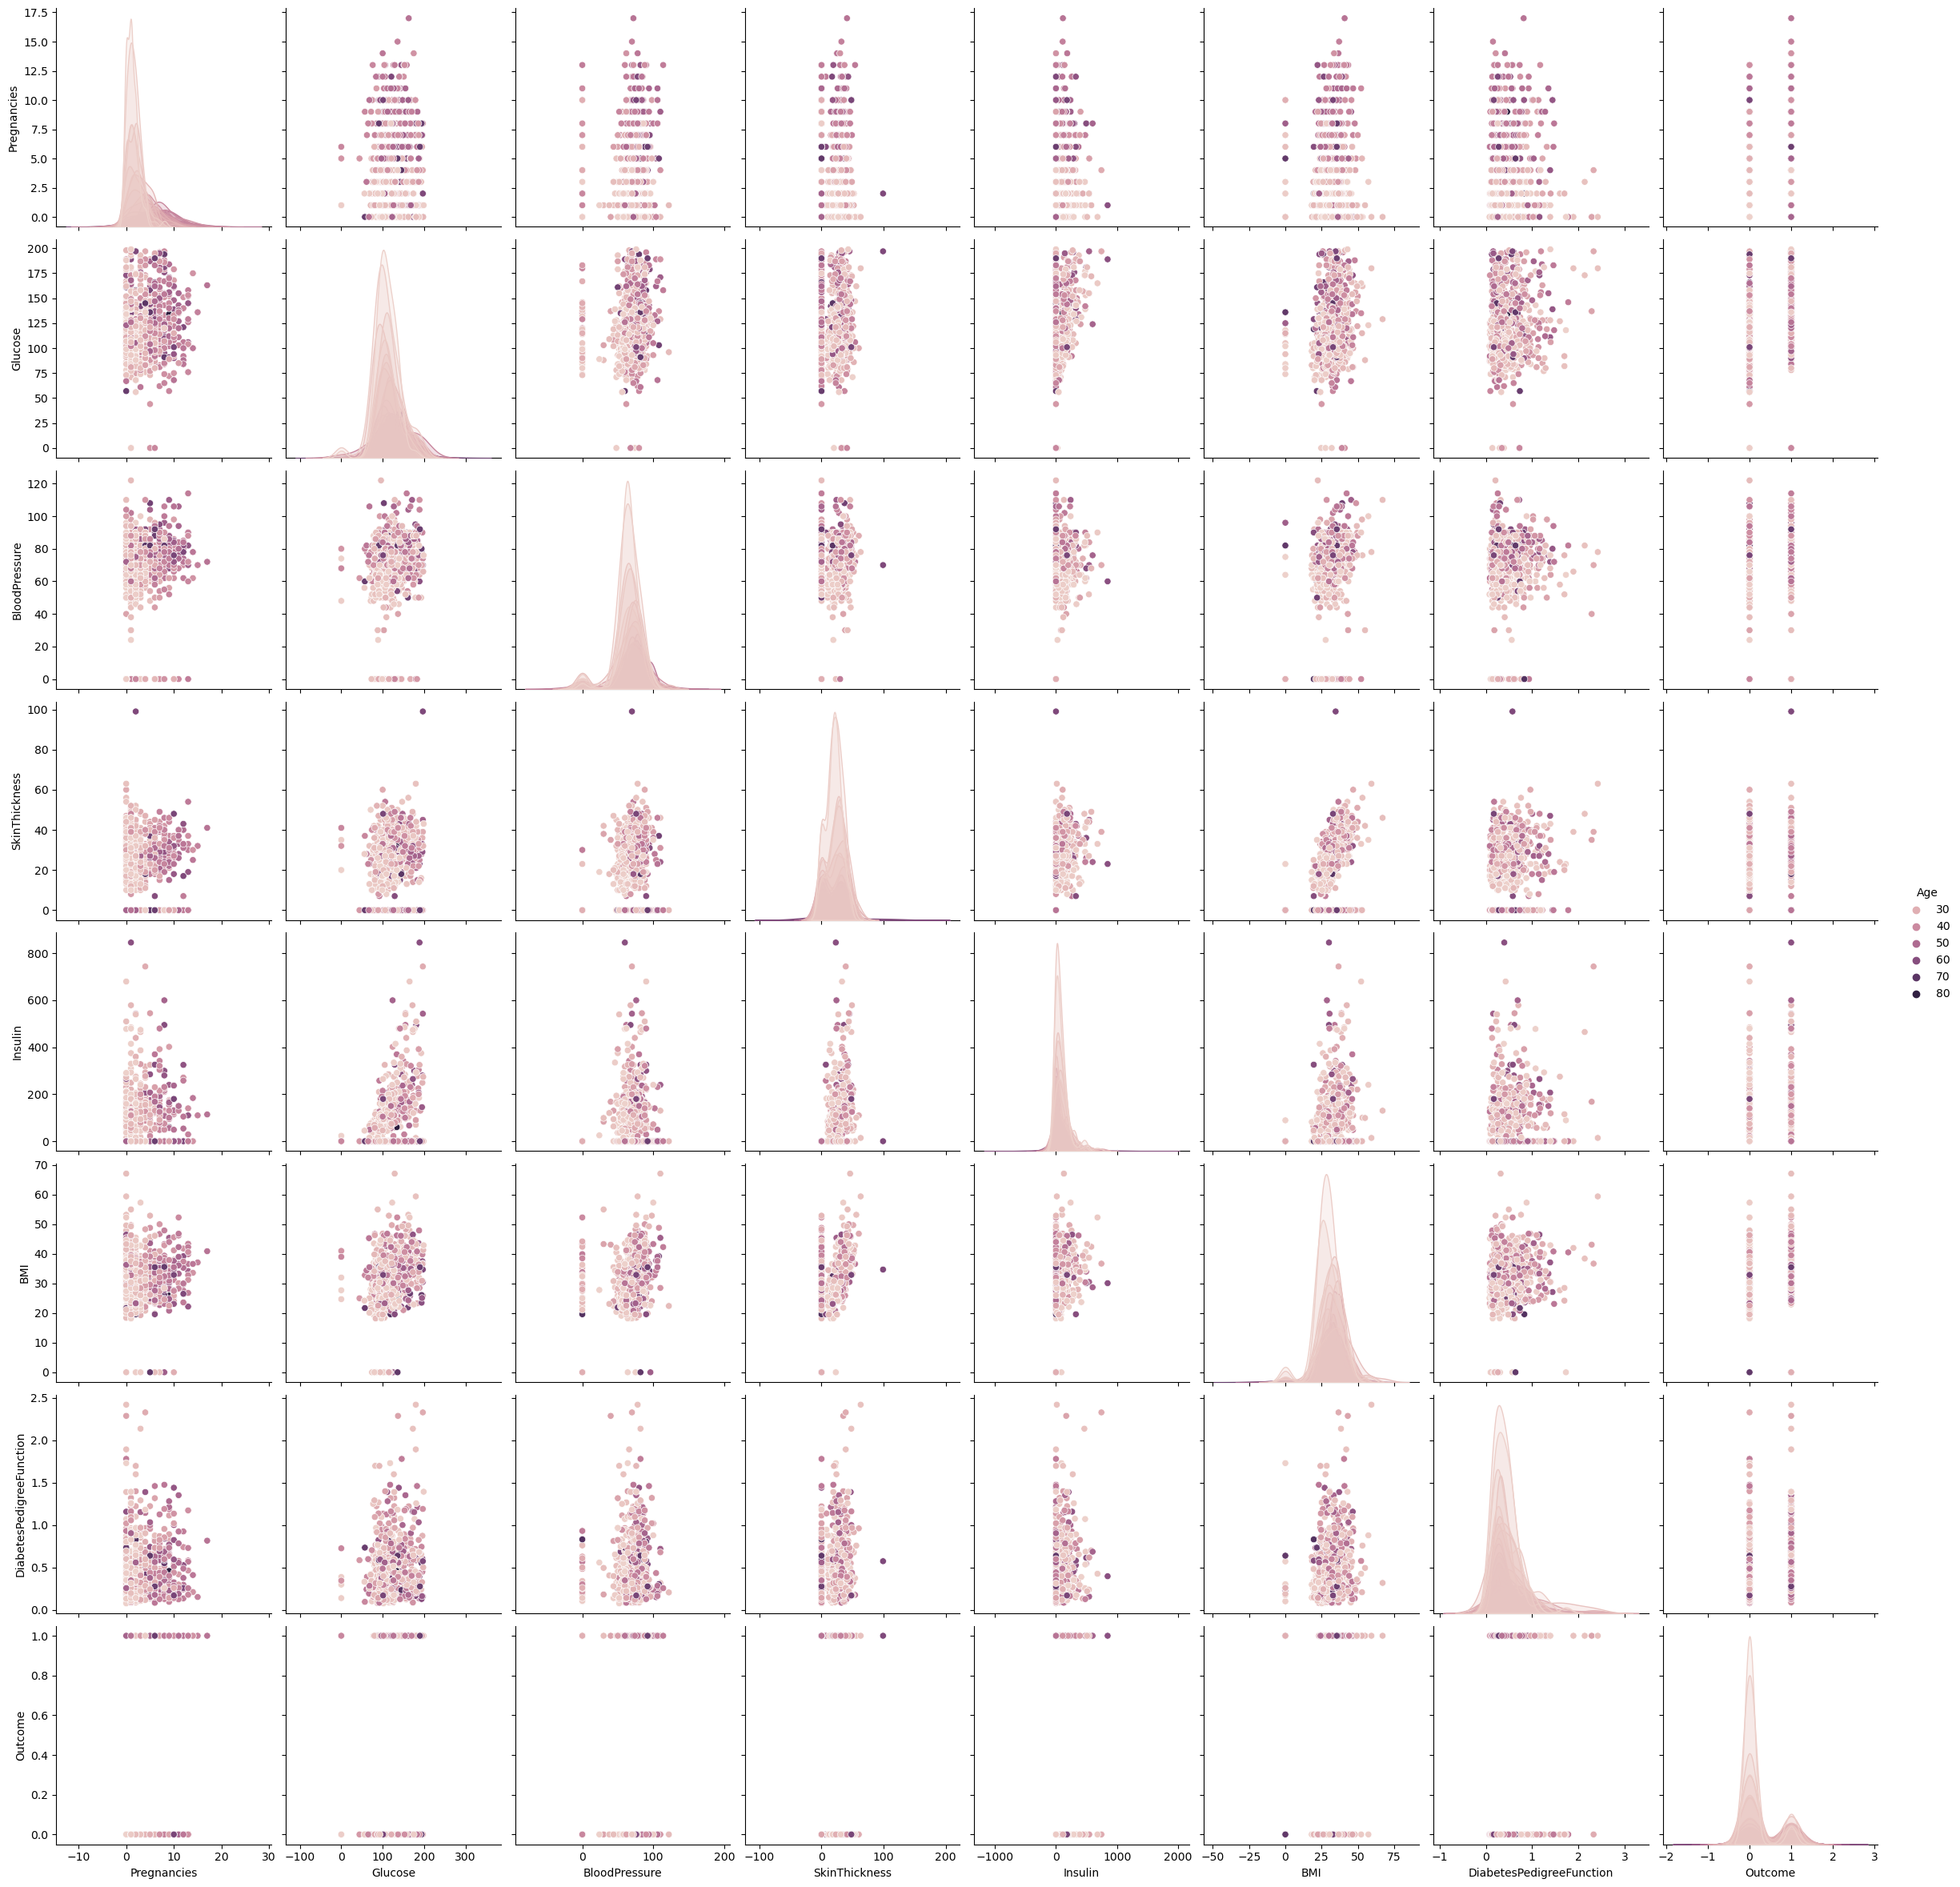

In [24]:
sns.pairplot(df,hue='Age',height=3)

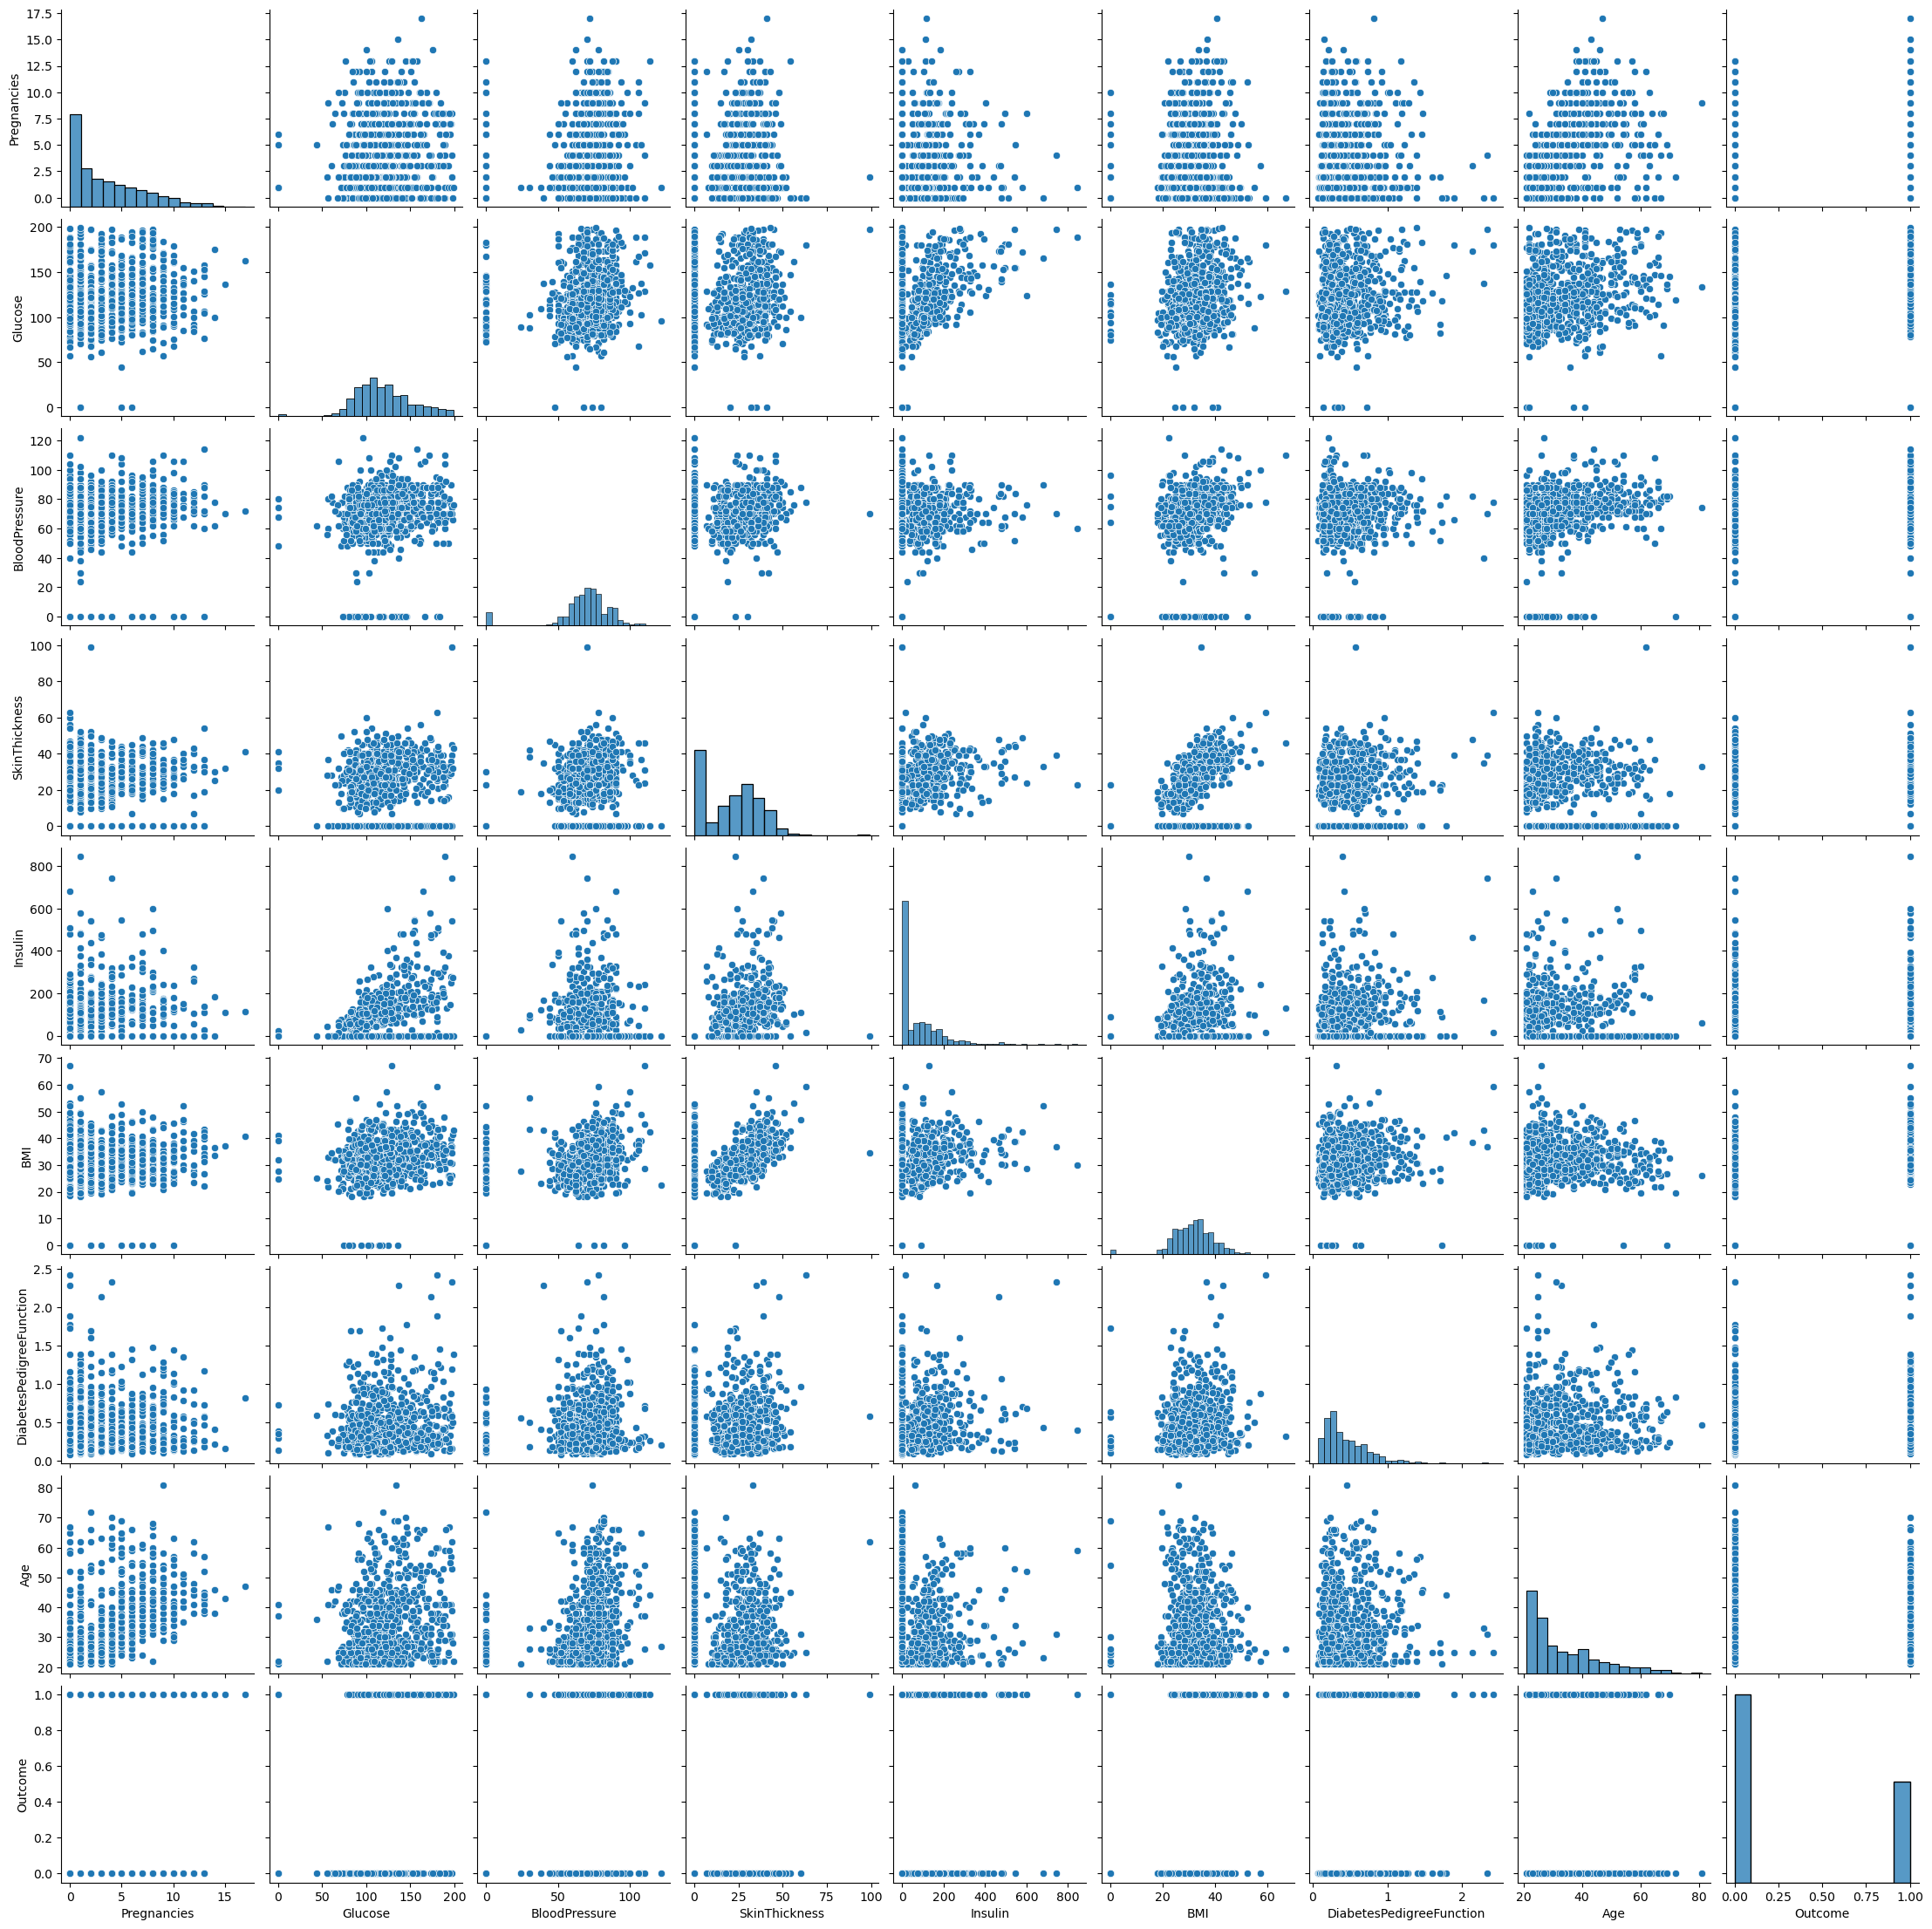

In [25]:
sns.pairplot(df)

In [26]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

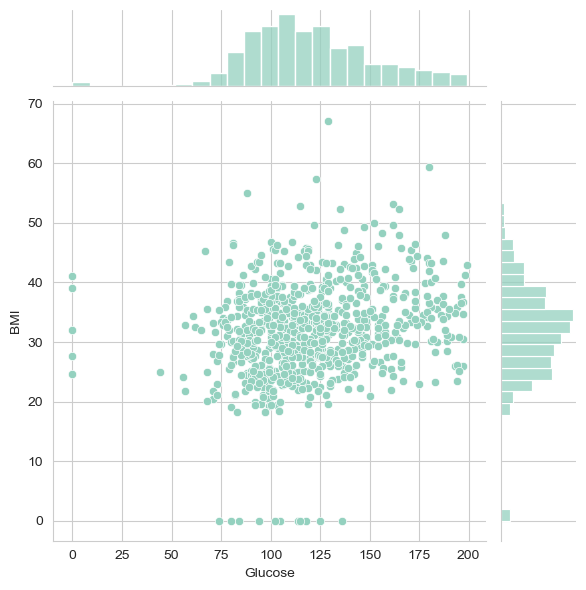

In [27]:
sns.jointplot(x='Glucose',y='BMI',data=df)

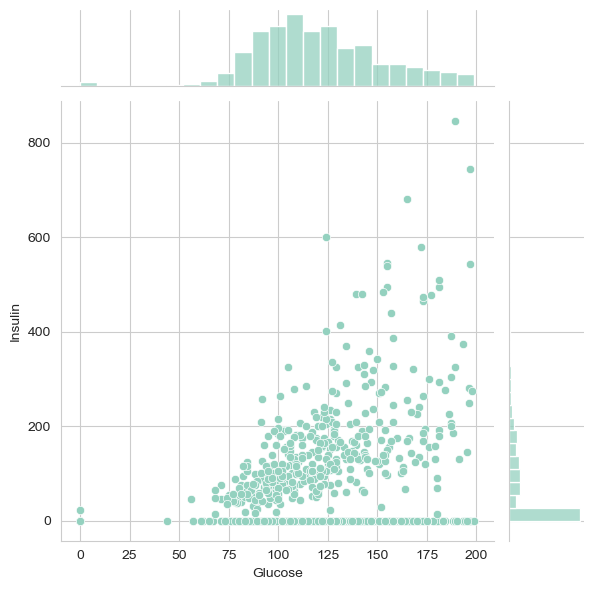

In [28]:
sns.jointplot(x='Glucose',y='Insulin',data=df)

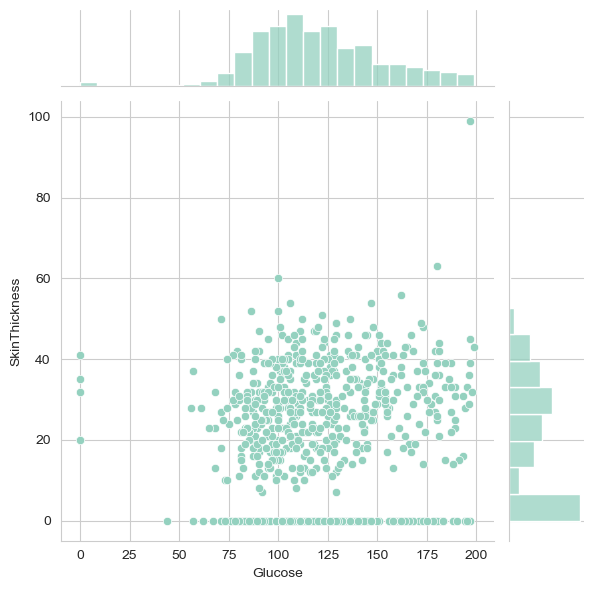

In [30]:
sns.jointplot(x='Glucose',y='SkinThickness',data=df)

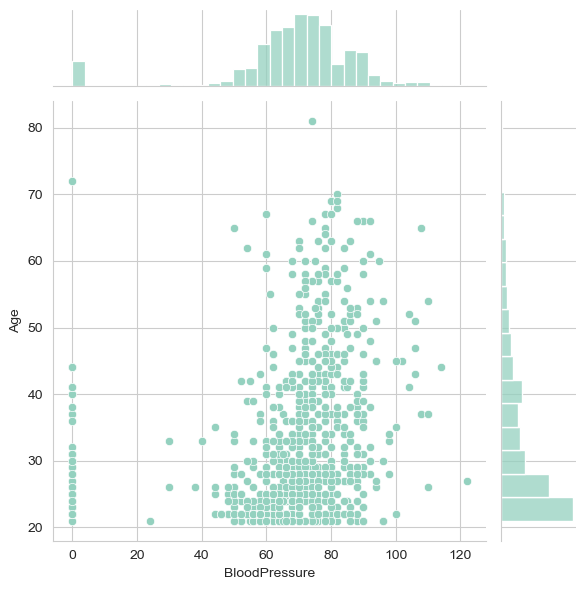

In [31]:
sns.jointplot(x='BloodPressure',y='Age',data=df)

#  Visually Understanding the performance of the model

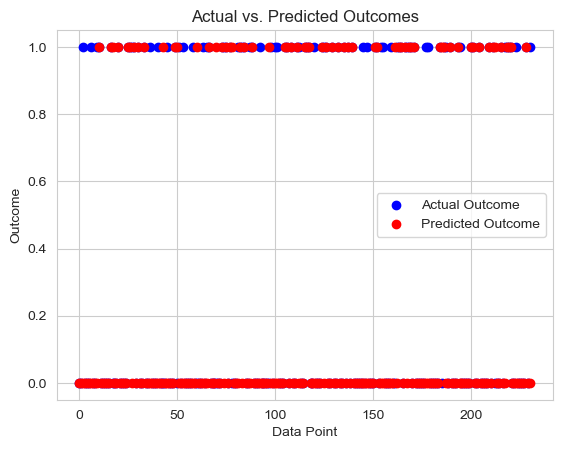

In [32]:
fig, ax=plt.subplots()  # creating figure
ax.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual Outcome') #plot the actual outcomes
# Plot the predicted outcomes
ax.scatter(range(len(Y_predict)), Y_predict, color='red', label='Predicted Outcome')
# Set axis labels and title
ax.set_xlabel('Data Point')
ax.set_ylabel('Outcome')
ax.set_title('Actual vs. Predicted Outcomes')
# Add a legend
ax.legend()
# Show the plot
plt.show()


<Axes: >

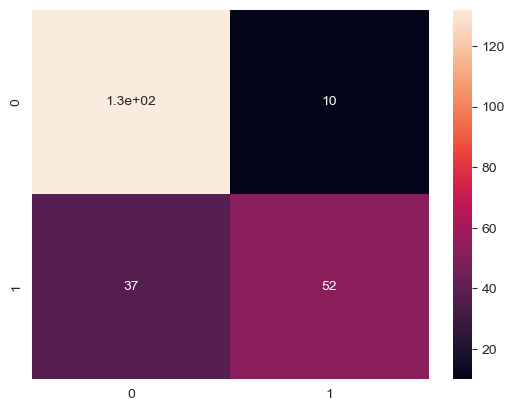

In [34]:
conf_matrix =confusion_matrix(Y_test,Y_predict)
sns.heatmap(conf_matrix,annot= True)